In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(A,a),(B,b)=tf.keras.datasets.cifar10.load_data()
A=A/255
B=B/255

In [5]:
dict1={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

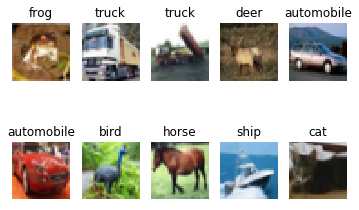

In [6]:
for i in range(1,11):
    plt.subplot(2,5,i,frameon=False)
    plt.xticks([]);plt.yticks([])
    plt.imshow(A[i-1])
    plt.title(dict1[a[i-1][0]])

# 訓練module

In [9]:
jmda_model=tf.keras.Sequential()
jmda_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',input_shape=[32,32,3],activation='selu'))
jmda_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
jmda_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='selu'))
jmda_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
jmda_model.add(tf.keras.layers.Flatten())
jmda_model.add(tf.keras.layers.AlphaDropout(0.2))
jmda_model.add(tf.keras.layers.Dense(128,activation='relu'))
jmda_model.add(tf.keras.layers.AlphaDropout(0.2))
jmda_model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
jmda_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [212]:
jmda_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [213]:
jmda_model.fit(A,a,epochs=21,validation_data=(B,b))

Train on 50000 samples, validate on 10000 samples
Epoch 1/21
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.8303 - sparse_categorical_accuracy: 0.3434 - val_loss: 1.5069 - val_sparse_categorical_accuracy: 0.5042
Epoch 2/21
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.3958 - sparse_categorical_accuracy: 0.4961 - val_loss: 1.4040 - val_sparse_categorical_accuracy: 0.5655
Epoch 3/21
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.2550 - sparse_categorical_accuracy: 0.5493 - val_loss: 1.3814 - val_sparse_categorical_accuracy: 0.6010
Epoch 4/21
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.1535 - sparse_categorical_accuracy: 0.5881 - val_loss: 1.2143 - val_sparse_categorical_accuracy: 0.6327
Epoch 5/21
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.0823 - sparse_categorical_accuracy: 0.6179 - val_loss: 1.1318 - val_sparse_categorical_accuracy: 0.6544
Epoch 6/21
5000

# 觀察模型分數

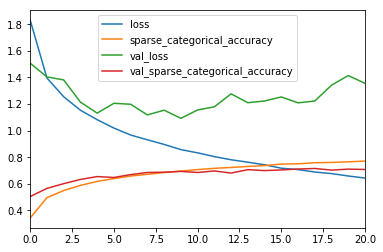

In [214]:
p1=pd.DataFrame(data=jmda_model.history.history.values())
p2=np.array(p1.values).T
key=jmda_model.history.history.keys()
history=pd.DataFrame(data=p2,columns=key)
history.plot()

# 觀察預測結果

答案

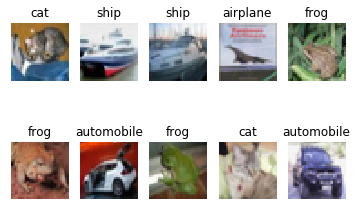

In [215]:
for i in range(1,11):
    plt.subplot(2,5,i,frameon=False)
    plt.xticks([]);plt.yticks([])
    plt.imshow(B[i-1])
    plt.title(dict1[b[i-1][0]])

預測數據

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


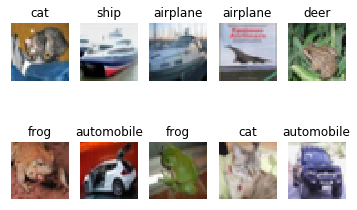

In [216]:
for i in range(1,11):
    plt.subplot(2,5,i,frameon=False)
    plt.xticks([]);plt.yticks([])
    plt.imshow(B[i-1])
    plt.title(dict1[np.argmax(jmda_model.predict(np.array(B[:10],dtype='Float16')),axis=1)[i-1]])